In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.metrics import accuracy_score,mean_squared_error,roc_curve,roc_auc_score,classification_report,r2_score,confusion_matrix

from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor


# For data visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns; sns.set()
# Plotly for interactive graphics 
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

# Disabling warnings
import warnings
warnings.simplefilter("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import warnings
warnings.filterwarnings("ignore")


In [2]:
data=pd.read_csv("C:\\Users\kbc\\Desktop\\weatherAUS.csv")
df=data.copy()
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
data.sample() 

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
3840,2011-03-12,BadgerysCreek,16.7,31.7,0.8,NaN,NaN,NW,26.0,WSW,...,83.0,45.0,1021.1,1018.8,NaN,NaN,21.6,29.8,No,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
df.RainTomorrow.unique()

array(['No', 'Yes', nan], dtype=object)

In [6]:
df.isnull().sum()  

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [7]:
df["RainTomorrow"].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [9]:
df.corr

<bound method DataFrame.corr of               Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W

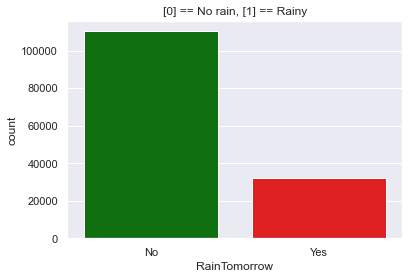

In [10]:
sns.countplot(df.RainTomorrow, palette=['green', 'red'])
plt.title("[0] == No rain, [1] == Rainy");

(16.5, -0.5)

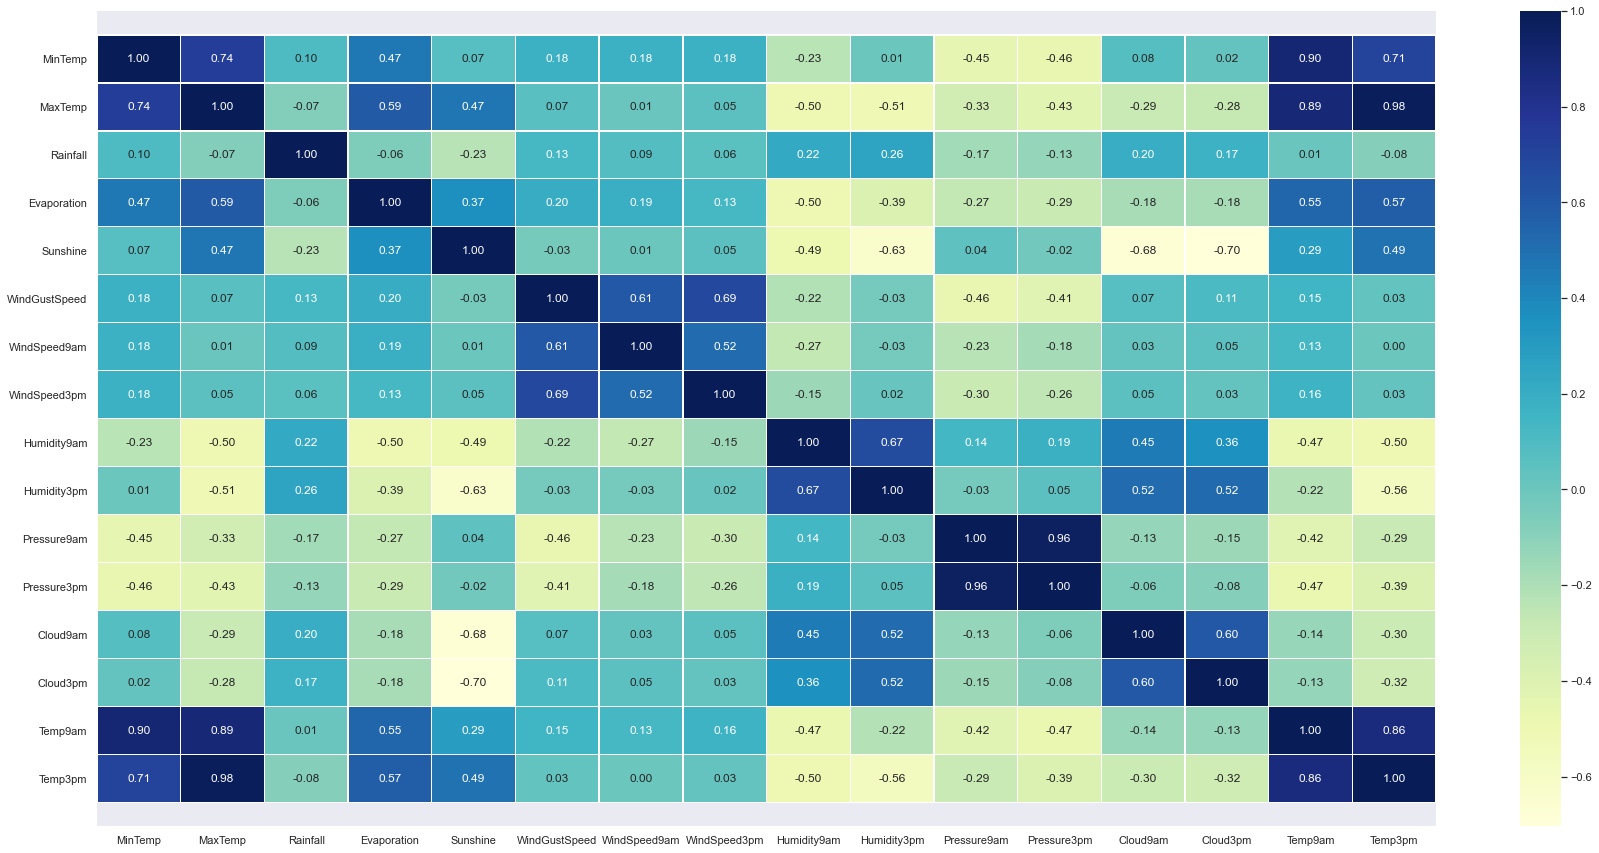

In [11]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(30, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [12]:
df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)
df[['RainToday', 'RainTomorrow']].isnull().sum()

RainToday       0
RainTomorrow    0
dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()
df["RainToday_label"] = lbe.fit_transform(df["RainToday"])
df["RainTomorrow_label"] = lbe.fit_transform(df["RainTomorrow"])

df.drop(['Location','WindDir9am','WindDir3pm'], axis=1, inplace=True) 

df = pd.get_dummies(df, drop_first=True, columns = ['WindGustDir'], prefix = ['WindGustDir'])



In [14]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeRegressor

#drop unnecessary columns and date columns
df_imputation = df.drop(['Date','RainToday','RainTomorrow'], axis=1) 

#define variables to keep the index and the columns
index = df_imputation.index
columns = df_imputation.columns

#imputation steps
imp_tree = IterativeImputer(random_state=0, estimator=DecisionTreeRegressor())
imp_tree.fit(df_imputation)
df_imputed = imp_tree.transform(df_imputation)

#transform imputed data in array format to dataframe
df_imputed_tree = pd.DataFrame(df_imputed, index=index, columns=columns)

df_imputed_tree.isnull().sum()


MinTemp               0
MaxTemp               0
Rainfall              0
Evaporation           0
Sunshine              0
WindGustSpeed         0
WindSpeed9am          0
WindSpeed3pm          0
Humidity9am           0
Humidity3pm           0
Pressure9am           0
Pressure3pm           0
Cloud9am              0
Cloud3pm              0
Temp9am               0
Temp3pm               0
RainToday_label       0
RainTomorrow_label    0
WindGustDir_ENE       0
WindGustDir_ESE       0
WindGustDir_N         0
WindGustDir_NE        0
WindGustDir_NNE       0
WindGustDir_NNW       0
WindGustDir_NW        0
WindGustDir_S         0
WindGustDir_SE        0
WindGustDir_SSE       0
WindGustDir_SSW       0
WindGustDir_SW        0
WindGustDir_W         0
WindGustDir_WNW       0
WindGustDir_WSW       0
dtype: int64

In [15]:
df2 = df_imputed_tree.copy()
x_dat = df2.drop(['RainTomorrow_label'],axis=1)
y = df2["RainTomorrow_label"].values
x=(x_dat-np.min(x_dat))/(np.max(x_dat)-np.min(x_dat)).values


In [16]:

from sklearn.model_selection import train_test_split,cross_val_score,ShuffleSplit,GridSearchCV
from sklearn.metrics import accuracy_score,mean_squared_error,roc_curve,roc_auc_score,classification_report,r2_score,confusion_matrix

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [17]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver = 'liblinear')
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [18]:
lr.intercept_
lr.coef_

array([[-0.73139562,  0.70233901,  2.51079773, -1.31621535, -2.08965952,
         6.5513299 , -1.76946135, -1.74260627,  0.13710082,  4.98154071,
         6.21051878, -9.55942456, -0.16817994,  0.80317724,  1.42254367,
         0.08269589,  0.55836567, -0.09883731, -0.12180536,  0.20120192,
        -0.19293446, -0.07683424,  0.17650496,  0.17741889, -0.15564633,
        -0.07630171, -0.11517317, -0.05171856,  0.08076281,  0.15070986,
         0.18089772,  0.09463431]])

In [19]:
l_score=accuracy_score(y_test,y_pred)
l_score

0.8471955868077752

In [20]:
c_l=confusion_matrix(y_test,y_pred)
c_l   

array([[30997,  1823],
       [ 4631,  4786]], dtype=int64)

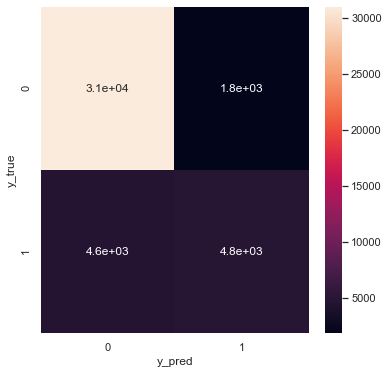

In [21]:
from sklearn.metrics import confusion_matrix  
y_true=y_test
y_pred=lr.predict(x_test)
cmlr=confusion_matrix(y_true, y_pred)
f,ax=plt.subplots(figsize=(6,6))
sns.heatmap(cmlr, annot=True)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [22]:
lr.predict(x_test)[0:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [23]:
lr.predict_proba(x_test)[0:10] 

array([[0.87395539, 0.12604461],
       [0.92473738, 0.07526262],
       [0.99020271, 0.00979729],
       [0.91674309, 0.08325691],
       [0.89019598, 0.10980402],
       [0.90383132, 0.09616868],
       [0.62211372, 0.37788628],
       [0.55058097, 0.44941903],
       [0.86748624, 0.13251376],
       [0.98818385, 0.01181615]])

In [24]:
y_probs = lr.predict_proba(x_test)[:,1]


In [25]:
y_pred = [1 if i>0.52 else 0 for i in y_probs]
y_pred[-10:]

[0, 0, 0, 1, 1, 0, 0, 0, 0, 0]

In [26]:
confusion_matrix(y_test,y_pred)

array([[31183,  1637],
       [ 4790,  4627]], dtype=int64)

In [27]:
accuracy_score(y_test,y_pred)
l_score = accuracy_score(y_test,y_pred)

### Naive Baise

In [28]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred=nb.predict(x_test)
y_pred[:10]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [29]:
n_score=accuracy_score(y_test,y_pred)
n_score

0.7884792954045031

In [30]:
c_nb=confusion_matrix(y_test,y_pred)
c_nb

array([[27036,  5784],
       [ 3150,  6267]], dtype=int64)

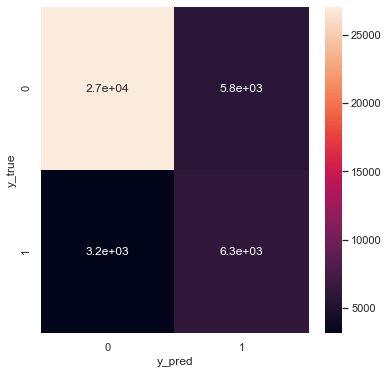

In [31]:
from sklearn.metrics import confusion_matrix   #Hepsi icin yapilabilir
y_true=y_test
y_pred=nb.predict(x_test)
cmnb=confusion_matrix(y_true, y_pred)
f,ax=plt.subplots(figsize=(6,6))
sns.heatmap(cmnb, annot=True)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [32]:
nb.predict(x_test)[0:10] 

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [33]:
nb.predict_proba(x_test)[0:10] 

array([[9.96082734e-01, 3.91726579e-03],
       [9.98084442e-01, 1.91555787e-03],
       [1.00000000e+00, 9.60793156e-11],
       [9.34364783e-01, 6.56352167e-02],
       [5.90092309e-01, 4.09907691e-01],
       [9.89443371e-01, 1.05566286e-02],
       [9.66168435e-01, 3.38315651e-02],
       [1.10964087e-01, 8.89035913e-01],
       [7.72623642e-01, 2.27376358e-01],
       [9.99567029e-01, 4.32970572e-04]])

In [34]:
y_probs = nb.predict_proba(x_test)[:,1]
y_pred = [1 if i>0.45 else 0 for i in y_probs]
y_pred[0:10]

[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]

In [35]:
nb_tuned_bestscore=accuracy_score(y_test,y_pred)
nb_tuned_bestscore

0.7852830456708573

In [36]:
cmnb_best=confusion_matrix(y_test,y_pred) 
cmnb_best

array([[26798,  6022],
       [ 3047,  6370]], dtype=int64)

## KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier
y=df2.RainTomorrow_label
x=df2.drop("RainTomorrow_label",axis=1)


In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                test_size = 0.25,
                                                random_state = 42)

In [42]:
knn = KNeighborsClassifier(n_neighbors=3).fit(x_train,y_train)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [43]:
knn_score=accuracy_score(y_test,y_pred)
knn_score

0.8277410006534648

In [44]:
c_knn=confusion_matrix(y_test,y_pred)
c_knn

array([[25067,  2320],
       [ 3743,  4067]], dtype=int64)

In [45]:
knn.predict(x_test)[0:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [46]:
knn.predict_proba(x_test)[0:10]

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [1.        , 0.        ]])

## SVM

In [50]:
from sklearn.svm import SVC
y=df2.RainTomorrow_label
x=df2.drop("RainTomorrow_label",axis=1)

In [51]:
y = df2.RainTomorrow_label
x = df2.drop('RainTomorrow_label',axis = 1)
x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                test_size = 0.25,
                                                random_state = 42)

In [ ]:
svm = SVC(C=5,degree=9,kernel = 'poly')
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)

In [ ]:
y_pred

In [ ]:
svm_score1 = accuracy_score(y_test,y_pred)
svm_score1

In [ ]:
indexx = ["Log","KNN","SVM","NB"]
regressions = [l_score,knn_tuned_score,svm_score1,n_score]

plt.figure(figsize=(8,6))
sns.barplot(x=indexx,y=regressions)
plt.xticks()
plt.ylim((0.77,0.86))
plt.title('Model Comparision',color = 'orange',fontsize=20)